In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

In [263]:
train = pd.read_csv("train.csv",encoding='latin_1',na_values=['#NAME?'])
test = pd.read_csv("test.csv",encoding='latin_1',na_values=['#NAME?'])
ss = pd.read_csv("sampleSubmission.csv",encoding='latin_1',na_values=['#NAME?'])

In [264]:
train.head()

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,94,Other,50000.0,7,petrol,subaru,No,03/04/16 0:00,0,34474,07/04/16 13:15
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,140,passat,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,0,50765,11/03/16 17:15
2,3,26/03/16 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,150,c_klasse,150000.0,2,diesel,mercedes_benz,No,26/03/16 0:00,0,90475,26/03/16 17:38
3,4,11/03/16 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,150,147,150000.0,9,diesel,alfa_romeo,No,11/03/16 0:00,0,40699,12/03/16 2:45
4,5,17/03/16 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,200,a4,125000.0,3,petrol,audi,No,17/03/16 0:00,0,84347,07/04/16 4:17


In [265]:
test.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,60001,14/03/16 12:52,"Jeep_Grand_Cherokee_""Overland""",private,offer,suv,2004,automatic,163,grand,125000.0,8,diesel,jeep,NaN,14/03/16 0:00,0,90480,05/04/16 12:47
1,60002,21/03/16 21:37,VW_PASSAT_1.9_TDI_131_PS_LEDER,private,offer,Combi,2004,manual,131,passat,150000.0,2,NaN,volkswagen,No,21/03/16 0:00,0,90762,23/03/16 2:50
2,60003,21/03/16 12:57,Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...,private,offer,suv,2011,manual,190,navara,70000.0,3,diesel,nissan,No,21/03/16 0:00,0,4177,06/04/16 7:45
3,60004,23/03/16 15:48,Ford_C_MAX_2.0_TDCi_DPF_Titanium,private,offer,bus,2007,manual,136,c_max,150000.0,6,diesel,ford,No,23/03/16 0:00,0,88361,05/04/16 18:45
4,60005,18/03/16 21:44,BMW_530d_touring_Vollausstattung_NAVI,private,offer,Combi,2002,automatic,193,5er,150000.0,9,diesel,bmw,Yes,18/03/16 0:00,0,73765,18/03/16 21:44


In [266]:
print(train.shape)
print(test.shape)
print(ss.shape)

(58857, 20)
(19609, 19)
(36, 2)


In [267]:
def find_outliers_tukey(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [268]:
print("x9")
x9_indices,x9_values = find_outliers_tukey(train['x9'])
print(np.sort(x9_values))
print("x11")
x11_indices,x11_values = find_outliers_tukey(train['x11'])
print(np.sort(x11_values))

x9
[  279   279   279 ... 17322 17932 19211]
x11
[]


In [271]:
#train["x9"] = np.where(df1[x9] >250, 3,df1['infant deaths'])
train.loc[train.x9>250,"x9"]=np.nan
train.x9 = train.x9.transform(lambda x : x.fillna(x.median()))

In [251]:
import numpy as np
import math
def power(value):
    if (value > 250):
        return train.x9.median()
    else:
        return value

In [272]:
#train["x9"] = train["x9"].apply(power)
print("x9")
x9_indices,x9_values = find_outliers_tukey(train['x9'])
print(np.sort(x9_values))

x9
[247. 249. 249. 249. 249. 249. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.
 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.]


In [234]:
train

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,private,offer,3850,Small Car,2004,manual,NaN,Other,50000.0,7,petrol,subaru,No,03/04/16 0:00,0,34474,07/04/16 13:15
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999,Combi,2007,manual,NaN,passat,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,0,50765,11/03/16 17:15
2,3,26/03/16 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990,limousine,2007,automatic,NaN,c_klasse,150000.0,2,diesel,mercedes_benz,No,26/03/16 0:00,0,90475,26/03/16 17:38
3,4,11/03/16 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000,limousine,2005,manual,NaN,147,150000.0,9,diesel,alfa_romeo,No,11/03/16 0:00,0,40699,12/03/16 2:45
4,5,17/03/16 17:49,Audi_A4,private,offer,12950,Combi,2005,manual,NaN,a4,125000.0,3,petrol,audi,No,17/03/16 0:00,0,84347,07/04/16 4:17
5,6,02/04/16 17:42,mercedes_c_kalse,private,offer,3600,limousine,2000,automatic,NaN,c_klasse,150000.0,5,petrol,mercedes_benz,No,02/04/16 0:00,0,45884,06/04/16 16:46
6,7,15/03/16 13:53,Passat_3bg_Variant_1_9TDI__6_Gang,private,offer,4450,Combi,2003,manual,NaN,passat,150000.0,7,diesel,volkswagen,No,15/03/16 0:00,0,58849,19/03/16 7:16
7,8,11/03/16 10:51,Gepflegtes_Familienauto,private,offer,10500,bus,2010,manual,NaN,5_reihe,80000.0,8,petrol,mazda,No,11/03/16 0:00,0,6116,05/04/16 21:17
8,9,25/03/16 0:56,BMW_645_Ci_M_PAKET_LEDER_NAVI_XENON_SPORTAUSPUFF,private,offer,10900,coupe,2004,automatic,121.0,6er,150000.0,12,petrol,bmw,No,24/03/16 0:00,0,10627,28/03/16 6:44
9,10,29/03/16 9:36,Audi_A3_1.4_TFSI,private,offer,17250,limousine,2013,manual,NaN,a3,30000.0,10,petrol,audi,No,29/03/16 0:00,0,10405,05/04/16 17:25


In [207]:
train["source"] = "train"
test["source"] = "test"

In [208]:
dataf = pd.concat([train,test],axis=0,sort=False)
dataf.head()

,x1,x2,x3,x4,x5,y,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,source
0,1,03/04/16 11:54,Subaru_G3X_Justy_1.3,private,offer,3850.0,Small Car,2004,manual,94,...,50000.0,7,petrol,subaru,No,03/04/16 0:00,0,34474,07/04/16 13:15,train
1,2,08/03/16 19:54,Volkswagen_Passat_Variant_2.0_TDI_DPF_Comfortline,private,offer,5999.0,Combi,2007,manual,140,...,150000.0,5,diesel,volkswagen,No,08/03/16 0:00,0,50765,11/03/16 17:15,train
2,3,26/03/16 17:38,Mercedes_Benz_C_220_CDI_Automatik_Elegance_AHK...,private,offer,5990.0,limousine,2007,automatic,150,...,150000.0,2,diesel,mercedes_benz,No,26/03/16 0:00,0,90475,26/03/16 17:38,train
3,4,11/03/16 13:42,Alfa_Romeo_147_1.9_JTD_16V_M_Jet,private,offer,4000.0,limousine,2005,manual,150,...,150000.0,9,diesel,alfa_romeo,No,11/03/16 0:00,0,40699,12/03/16 2:45,train
4,5,17/03/16 17:49,Audi_A4,private,offer,12950.0,Combi,2005,manual,200,...,125000.0,3,petrol,audi,No,17/03/16 0:00,0,84347,07/04/16 4:17,train


In [166]:
dataf.nunique()

x1        78466
x2        12880
x3        52600
x4            1
x5            1
y          2358
x6            8
x7           17
x8            2
x9          437
x10         235
x11          13
x12          13
x13           7
x14          38
x15           2
x16          80
x17           1
x18        7419
x19       11941
source        2
dtype: int64

In [167]:
dataf.isna().sum()

x1            0
x2            0
x3            0
x4            0
x5            0
y         19609
x6         2480
x7            0
x8         2224
x9            0
x10           0
x11           0
x12           0
x13        2839
x14           0
x15        9098
x16           0
x17           0
x18           0
x19           0
source        0
dtype: int64

In [168]:
dataf[dataf.duplicated()].sum()

x1        0.0
x2        0.0
x3        0.0
x4        0.0
x5        0.0
y         0.0
x6        0.0
x7        0.0
x8        0.0
x9        0.0
x10       0.0
x11       0.0
x12       0.0
x13       0.0
x14       0.0
x15       0.0
x16       0.0
x17       0.0
x18       0.0
x19       0.0
source    0.0
dtype: float64

In [15]:
pandas_profiling.ProfileReport(dataf)

Number of variables,22
Number of observations,78466
Total Missing (%),2.1%
Total size in memory,13.2 MiB
Average record size in memory,176.0 B
Numeric,8
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,3


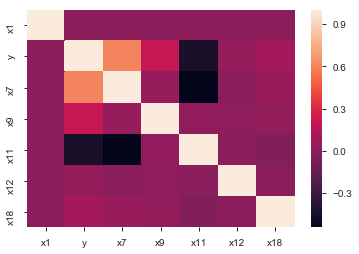

In [19]:
# calculate the correlation matrix
corr = dataf.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [190]:
dataf.x9.value_counts()

0        4420
140      4329
75       3686
150      3330
105      3233
170      3031
116      2735
101      2299
163      2082
60       1947
143      1831
90       1830
131      1594
109      1552
136      1496
125      1349
102      1343
122      1339
177      1287
80       1192
120      1124
69       1093
110      1065
184       906
86        839
95        811
179       784
160       773
218       756
231       754
         ... 
338         1
274         1
1105        1
6226        1
11530       1
1164        1
460         1
345         1
283         1
294         1
1055        1
805         1
740         1
612         1
483         1
17322       1
5411        1
2016        1
1056        1
671         1
411         1
415         1
1501        1
10520       1
221         1
1500        1
1436        1
540         1
348         1
287         1
Name: x9, Length: 437, dtype: int64

In [114]:
dataf.x8.value_counts()

manual       56674
automatic    19568
Name: x8, dtype: int64

In [209]:
dataf.describe(percentiles=[0.95])

,x1,y,x7,x9,x11,x12,x17,x18
count,78466.000000,58857.000000,78466.000000,78466.000000,78466.000000,78466.000000,78466.0,78466.000000
mean,39519.140749,7638.980971,2006.285066,129.894553,120115.910076,6.176854,0.0,51912.579984
std,23024.762905,6710.787043,4.026041,162.924303,41245.291086,3.522743,0.0,25632.180866
min,1.000000,1001.000000,2000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
50%,39233.500000,5400.000000,2006.000000,122.000000,150000.000000,6.000000,0.0,51065.000000
95%,75685.750000,21999.000000,2013.000000,239.000000,150000.000000,12.000000,0.0,93083.000000
max,79609.000000,39800.000000,2016.000000,19211.000000,150000.000000,12.000000,0.0,99998.000000


In [169]:
def applymode(x):
    a = x.mode()[0]
    return x.fillna(a)

In [170]:
dataf.x6=dataf.groupby(["x14"]).x6.transform(applymode)
dataf.x8=dataf.groupby(["x14"]).x8.transform(applymode)
dataf.x13=dataf.groupby(["x14","x8"]).x13.transform(applymode)
dataf.x15=dataf.groupby(['x11']).x15.transform(applymode)

In [171]:
dataf.drop(columns=["x2","x3","x4","x10","x16","x17","x18","x19"],inplace=True)
#x12

In [172]:
dataf_col_category = dataf.select_dtypes(exclude=[np.number]).columns
dataf_col_Integer = dataf.columns.difference(dataf_col_category)
dataf[dataf_col_category].nunique()

x5         1
x6         8
x8         2
x13        7
x14       38
x15        2
source     2
dtype: int64

In [173]:
dataf_one_hot = pd.get_dummies(dataf[dataf_col_category])

In [174]:
data_model = pd.concat([dataf_one_hot,dataf[dataf_col_Integer]],axis=1)
data_model.head()

,x5_offer,x6_Combi,x6_Other,x6_Small Car,x6_bus,x6_cabrio,x6_coupe,x6_limousine,x6_suv,x8_automatic,...,x15_No,x15_Yes,source_test,source_train,x1,x11,x12,x7,x9,y
0,1,0,0,1,0,0,0,0,0,0,...,1,0,0,1,1,50000.0,7,2004,94,3850.0
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,2,150000.0,5,2007,140,5999.0
2,1,0,0,0,0,0,0,1,0,1,...,1,0,0,1,3,150000.0,2,2007,150,5990.0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,4,150000.0,9,2005,150,4000.0
4,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,5,125000.0,3,2005,200,12950.0


In [175]:
train_modified = data_model.loc[data_model.source_train==1.0,:]
test_modified = data_model.loc[data_model.source_train==0.0,:]
train_modified=train_modified.drop(['source_test', 'source_train'],axis=1)
test_modified=test_modified.drop(['source_test', 'source_train','y'],axis=1)

In [176]:
train_modified.head()

,x5_offer,x6_Combi,x6_Other,x6_Small Car,x6_bus,x6_cabrio,x6_coupe,x6_limousine,x6_suv,x8_automatic,...,x14_volkswagen,x14_volvo,x15_No,x15_Yes,x1,x11,x12,x7,x9,y
0,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,50000.0,7,2004,94,3850.0
1,1,1,0,0,0,0,0,0,0,0,...,1,0,1,0,2,150000.0,5,2007,140,5999.0
2,1,0,0,0,0,0,0,1,0,1,...,0,0,1,0,3,150000.0,2,2007,150,5990.0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,4,150000.0,9,2005,150,4000.0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,5,125000.0,3,2005,200,12950.0


In [177]:
test_modified.head()

,x5_offer,x6_Combi,x6_Other,x6_Small Car,x6_bus,x6_cabrio,x6_coupe,x6_limousine,x6_suv,x8_automatic,...,x14_toyota,x14_volkswagen,x14_volvo,x15_No,x15_Yes,x1,x11,x12,x7,x9
0,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,60001,125000.0,8,2004,163
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,60002,150000.0,2,2004,131
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,60003,70000.0,3,2011,190
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,60004,150000.0,6,2007,136
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,60005,150000.0,9,2002,193


In [178]:
train_modified.to_csv("train_ready_for_model.csv",index=False)
test_modified.to_csv("test_ready_for_model.csv",index=False)